In [104]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from itertools import product

from tqdm import tqdm

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


In [105]:
df = pd.read_csv(r'..\..\datos\robust.csv', index_col = 0)

In [106]:
df.dtypes

dateCrawled             object
name                    object
seller                  object
offerType               object
price                  float64
abtest                  object
vehicleType             object
yearOfRegistration      object
gearbox                 object
powerCV                float64
model                   object
kilometer              float64
monthOfRegistration     object
fuelType                object
brand                   object
notRepairedDamage       object
dateCreated             object
postalCode               int64
lastSeen                object
dtype: object

In [107]:
df["postalCode"] = df["postalCode"].astype('object')

In [108]:
df_numeric = df.select_dtypes('number')

Vamos a querer identificar los outliers de nuestra variable respuesta, precio, puesta en contexto con el resto de variables numéricas, powerCV y kilometer. Para ello, realizaremos una identificación de outliers multivariantes, tomando las 3 columnas numéricas como objeto de estudio.

Vamos a usar 5 valores de n de estimadores y de contaminaciones posibles, lo cual nos da 25 combinaciones posibles.

In [109]:
ests = np.linspace(1,1000, 5, dtype = int)
conts = np.linspace(0.01,0.2,5)

forest_arg_combis = list(product(ests, conts))

Generemos los Isolation Forest para cada una de las combinaciones y añadámoslas a una columna nueva.

In [110]:
for n,m in tqdm(forest_arg_combis):
    iforest = IsolationForest(random_state=42, n_estimators=n, contamination=m, n_jobs=12)
    df[f"iforest_{n}_{m:.3f}"] = iforest.fit_predict(X=df_numeric)
    print(f"Creando iforest_{n}_{m:.3f}...")

  8%|▊         | 2/25 [00:00<00:02,  9.68it/s]

Creando iforest_1_0.010...
Creando iforest_1_0.058...
Creando iforest_1_0.105...


 16%|█▌        | 4/25 [00:00<00:01, 10.88it/s]

Creando iforest_1_0.153...
Creando iforest_1_0.200...


 24%|██▍       | 6/25 [00:10<00:47,  2.48s/it]

Creando iforest_250_0.010...


 28%|██▊       | 7/25 [00:20<01:20,  4.45s/it]

Creando iforest_250_0.058...


 32%|███▏      | 8/25 [00:31<01:41,  5.98s/it]

Creando iforest_250_0.105...


 36%|███▌      | 9/25 [00:41<01:54,  7.15s/it]

Creando iforest_250_0.153...


 40%|████      | 10/25 [00:51<02:00,  8.03s/it]

Creando iforest_250_0.200...


 44%|████▍     | 11/25 [01:13<02:47, 11.99s/it]

Creando iforest_500_0.010...


 48%|████▊     | 12/25 [01:34<03:10, 14.62s/it]

Creando iforest_500_0.058...


 52%|█████▏    | 13/25 [01:55<03:18, 16.50s/it]

Creando iforest_500_0.105...


 56%|█████▌    | 14/25 [02:16<03:17, 17.94s/it]

Creando iforest_500_0.153...


 60%|██████    | 15/25 [02:37<03:08, 18.82s/it]

Creando iforest_500_0.200...


 64%|██████▍   | 16/25 [03:09<03:23, 22.64s/it]

Creando iforest_750_0.010...


 68%|██████▊   | 17/25 [03:41<03:23, 25.43s/it]

Creando iforest_750_0.058...


 72%|███████▏  | 18/25 [04:13<03:11, 27.31s/it]

Creando iforest_750_0.105...


 76%|███████▌  | 19/25 [04:44<02:51, 28.59s/it]

Creando iforest_750_0.153...


 80%|████████  | 20/25 [05:16<02:27, 29.53s/it]

Creando iforest_750_0.200...


 84%|████████▍ | 21/25 [05:57<02:12, 33.00s/it]

Creando iforest_1000_0.010...


 88%|████████▊ | 22/25 [06:38<01:46, 35.38s/it]

Creando iforest_1000_0.058...


 92%|█████████▏| 23/25 [07:20<01:14, 37.30s/it]

Creando iforest_1000_0.105...


 96%|█████████▌| 24/25 [08:01<00:38, 38.46s/it]

Creando iforest_1000_0.153...


100%|██████████| 25/25 [08:43<00:00, 20.93s/it]

Creando iforest_1000_0.200...


Vamos a crear un nuevo dataframe que contenga cada uno de los resultados obtenidos con cada una de las combinaciones con IsolationForest.

In [111]:
df_forest = df.filter(like="iforest")

Ploteamos en 3D, cada variable en un eje.

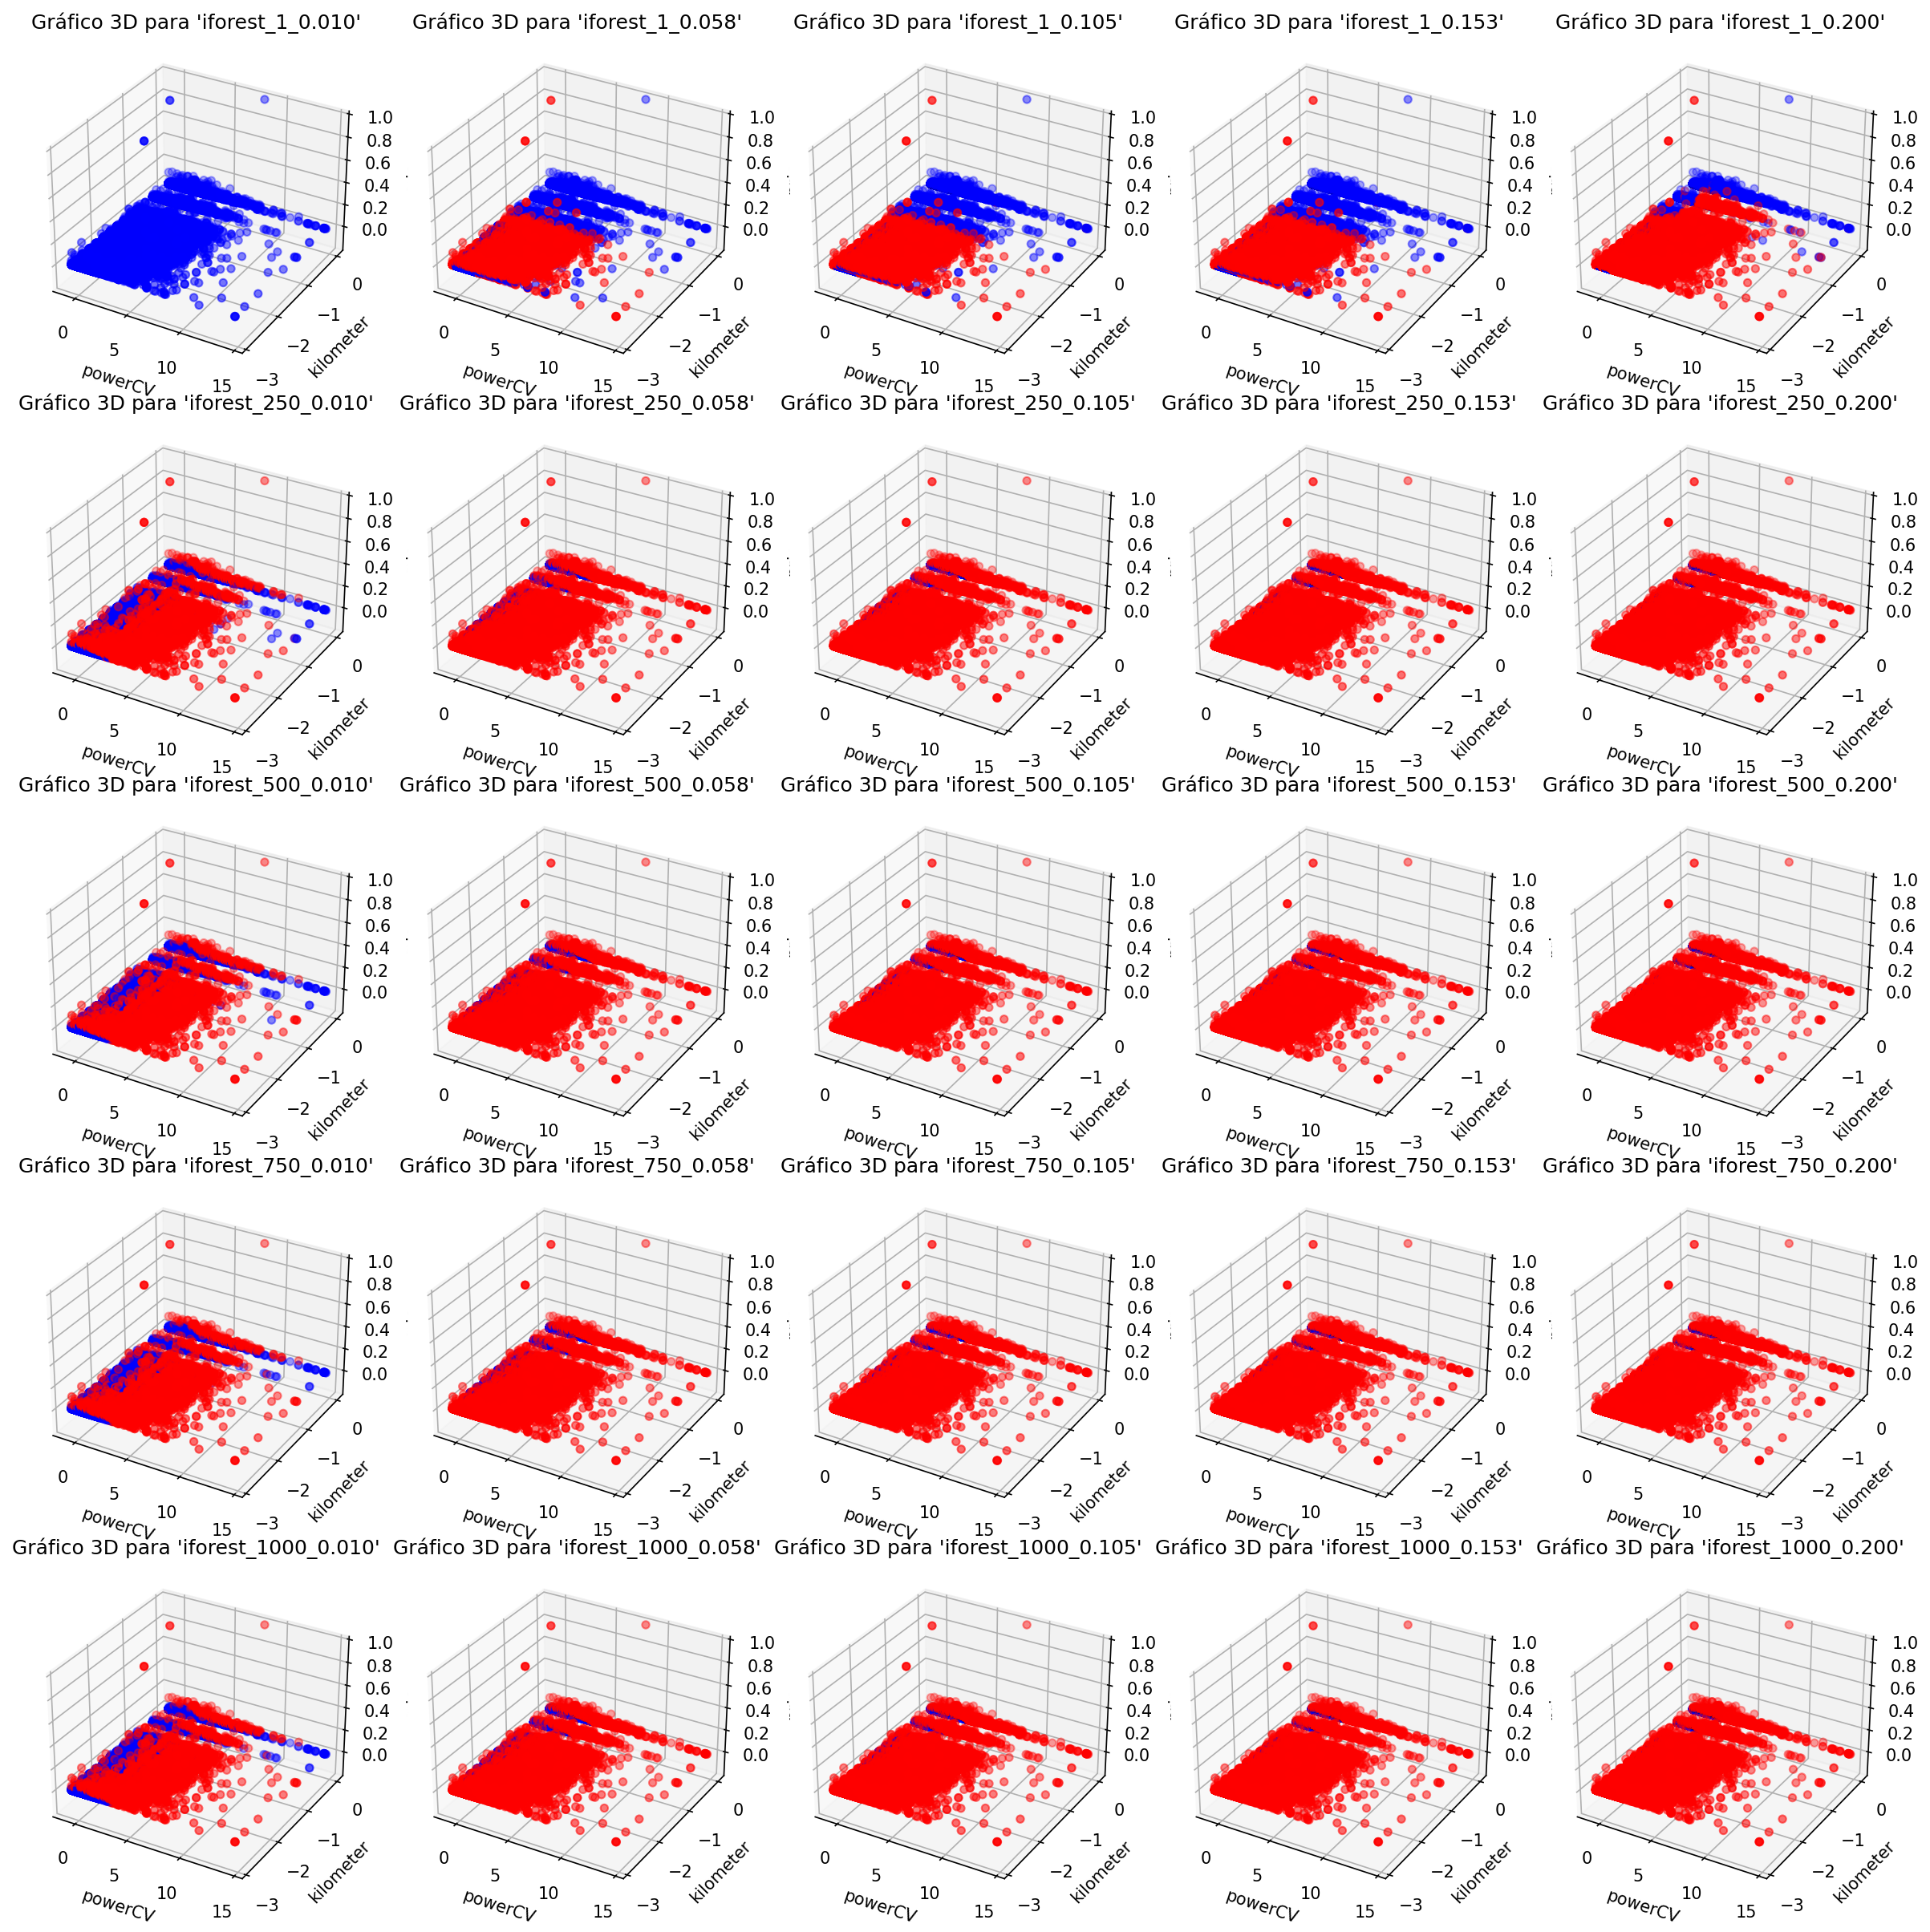

In [112]:
# x = df_numeric["powerCV"]
# y = df_numeric["kilometer"]
# z = df_numeric["price"]

# color = {1 : "blue", -1 : "red"}

# n_rows = 5
# n_cols = 5

# fig = plt.figure(figsize=(16, 16), dpi=150)

# for idx, col in enumerate(df_forest.columns):
#     colors = df_forest[col].map(color) 
    

#     ax = fig.add_subplot(n_rows, n_cols, idx + 1, projection='3d')
#     ax.scatter(x, y, z, c=colors)
    
#     ax.set_title(f"Gráfico 3D para '{col}'")
#     ax.set_xlabel("powerCV")
#     ax.set_ylabel("kilometer")
#     ax.set_zlabel("price")

#     ax.set_zlim(top=1e6)
# plt.tight_layout()
# plt.show()


In [113]:
def percent_outs(array):
    length = len(array)
    neg_count = sum(array==-1)
    p_outs = neg_count/length*100
    return p_outs

Calculemos qué porcentaje de las combinaciones clasifican a cada una de las filas como atípico.

In [114]:
percentages = df_forest.apply(percent_outs, axis=1)

Nos quedaremos con aquellos valores que fueron marcados como atípicos en el 70% de los casos, ya que, teniendo en cuenta de que trabajamos con 25 combinaciones, más del 70% de ellos son al menos 18 combinaciones.

Veamos ahora una comparación de cómo cambian nuestros datos (antes y después de filtrar).

In [115]:
df_filtered_1 = df[percentages<70]

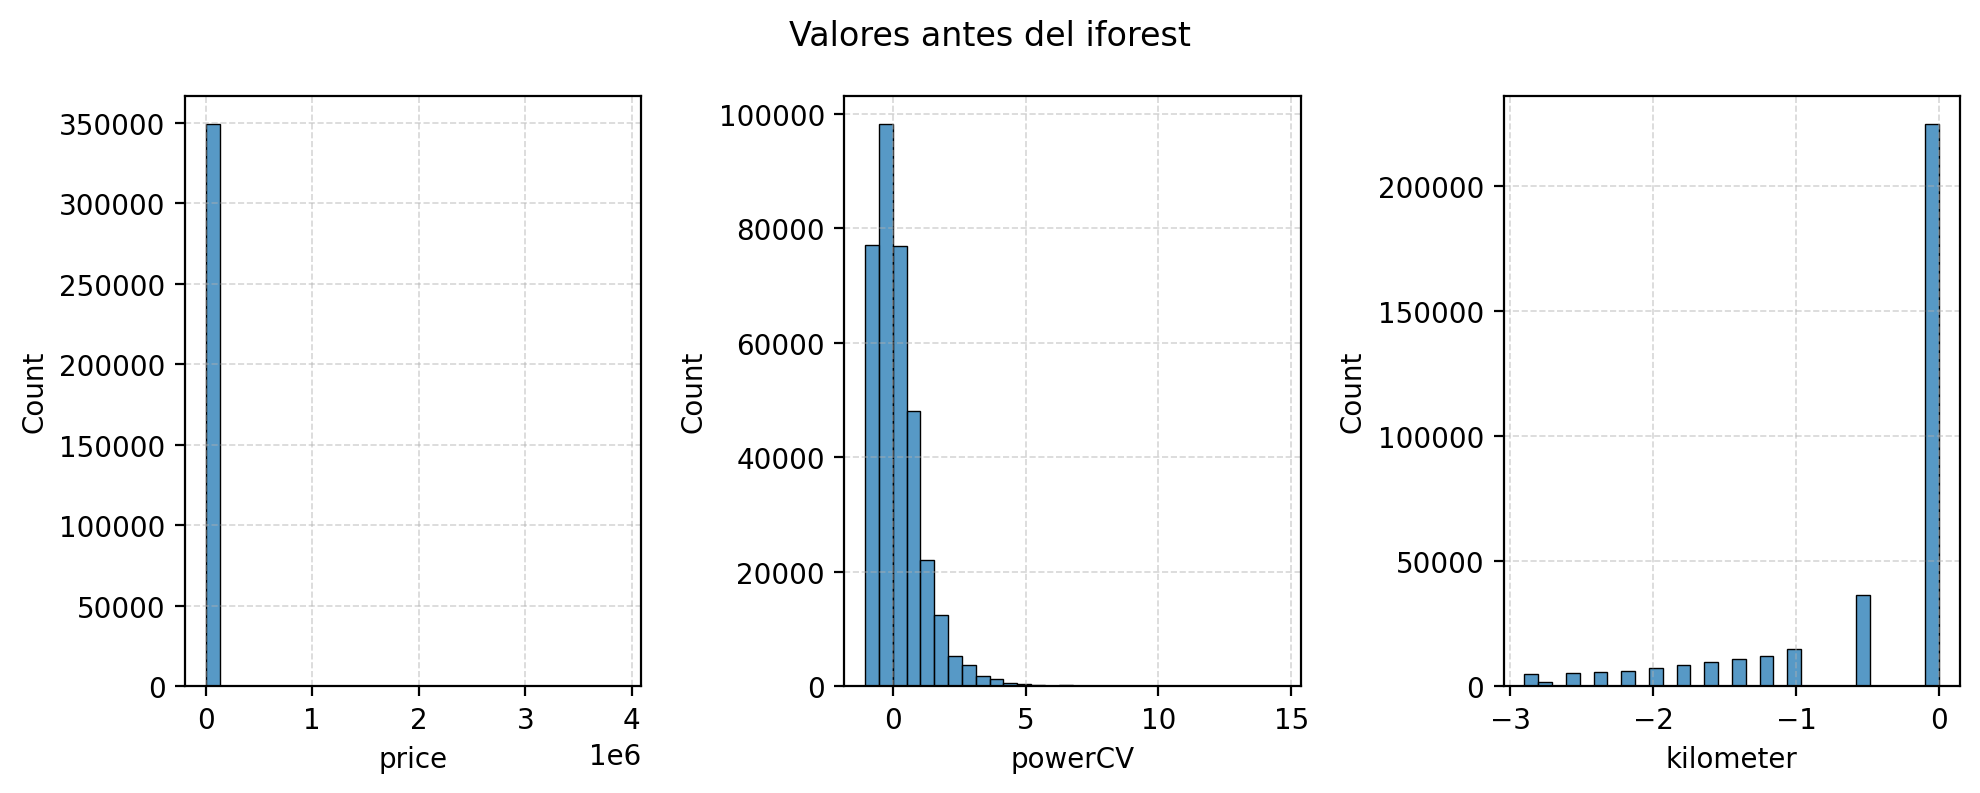

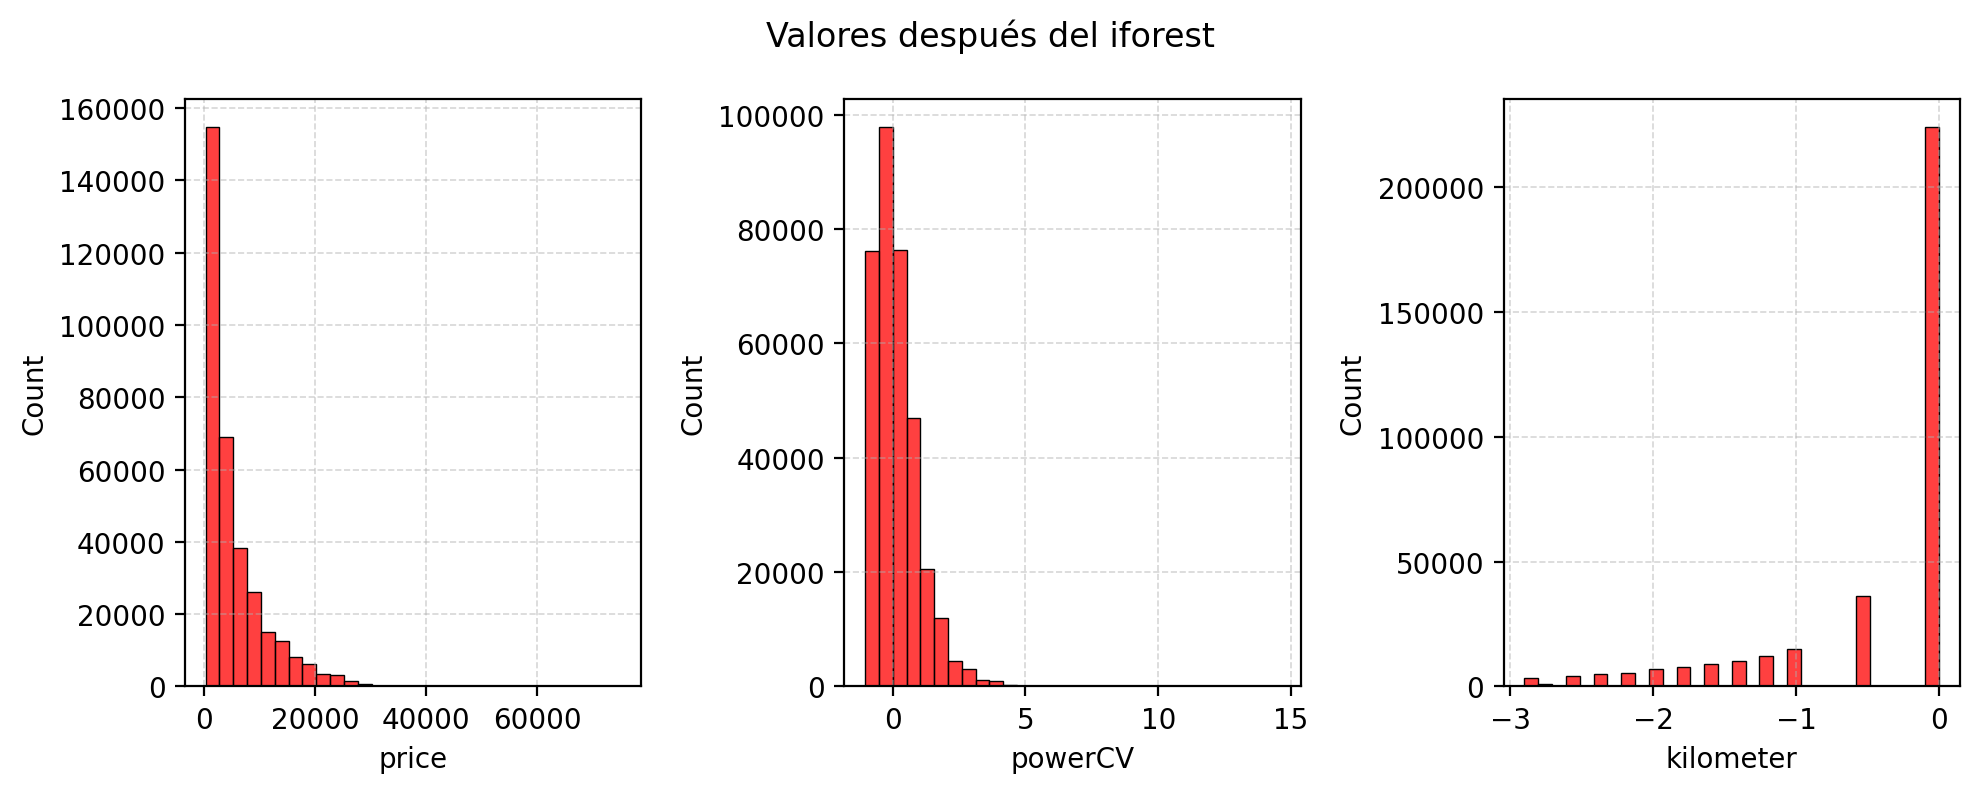

In [116]:
fig, axes = plt.subplots(1,3, figsize = (10,4), dpi = 200)
for i, col in enumerate(df.select_dtypes("number").columns[:3]):
    axes[i].grid(ls = "--", lw = 0.6, alpha = 0.5)
    sns.histplot(df, x = col, bins = 30, ax = axes[i])
plt.suptitle("Valores antes del iforest")
plt.tight_layout()

plt.show()

fig, axes = plt.subplots(1,3, figsize = (10,4), dpi = 200)
for i, col in enumerate(df.select_dtypes("number").columns[:3]):
    axes[i].grid(ls = "--", lw = 0.6, alpha = 0.5)
    sns.histplot(df_filtered_1, x = col, bins = 30, ax = axes[i], color="red")
plt.suptitle("Valores después del iforest")
plt.tight_layout()

plt.show()


Vemos que ahora los precios están mucho más contenidos, habiendo podido filtrar aquellos mucho mayores de 60000, hasta el punto de que sea visible nuestra distribución.

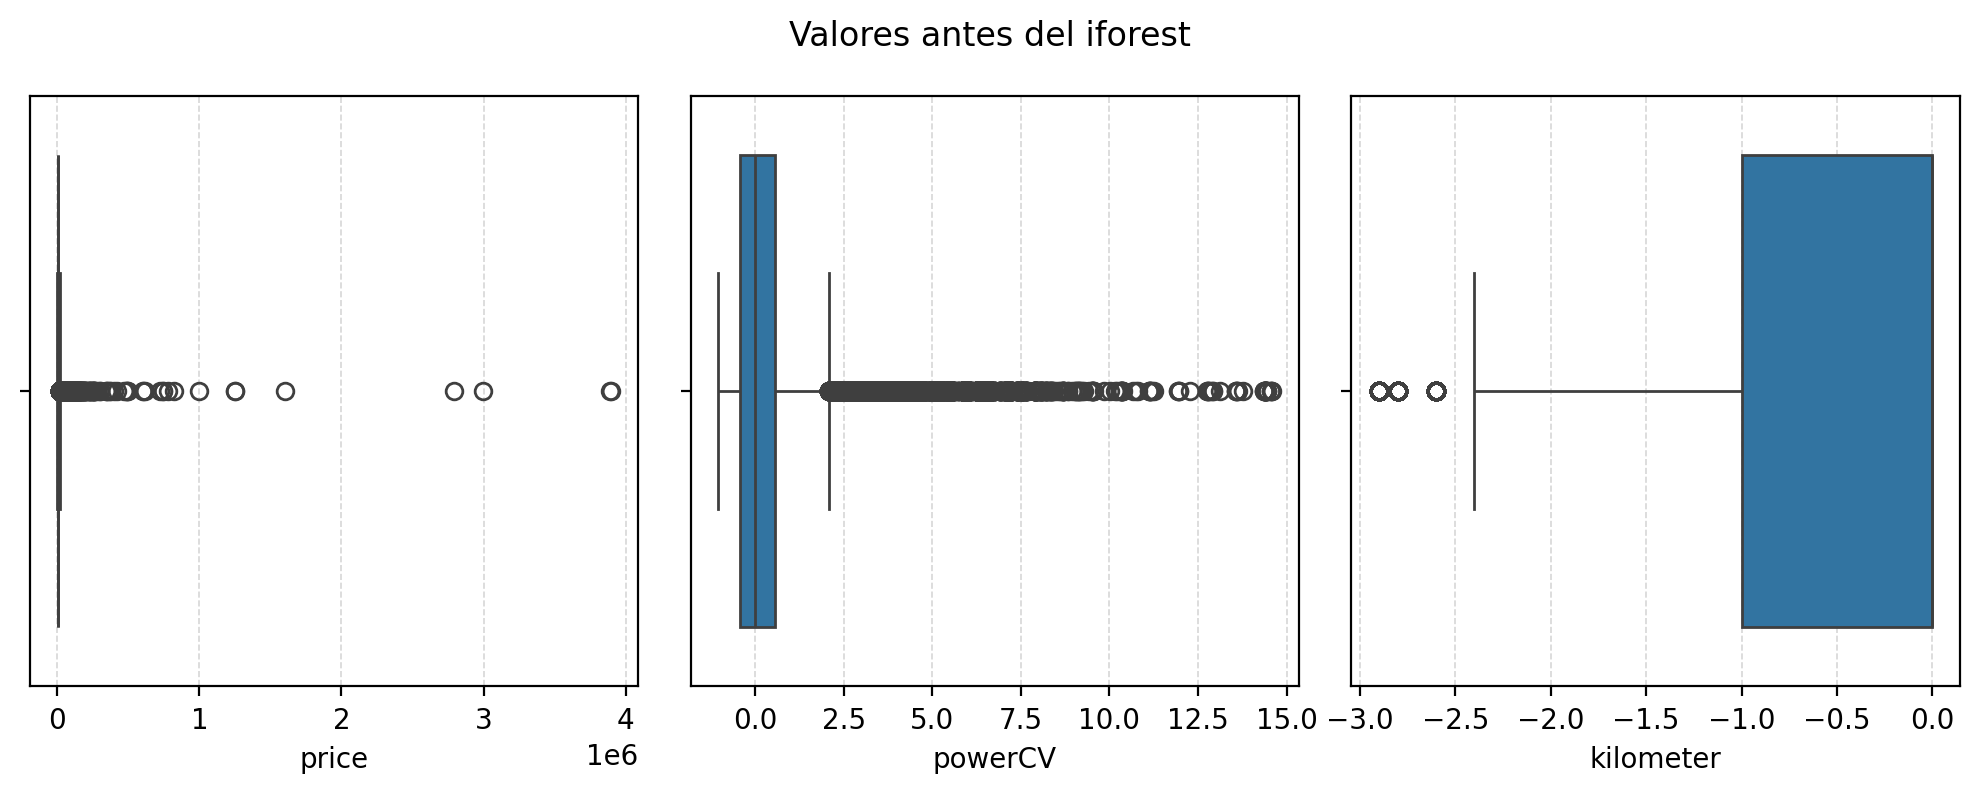

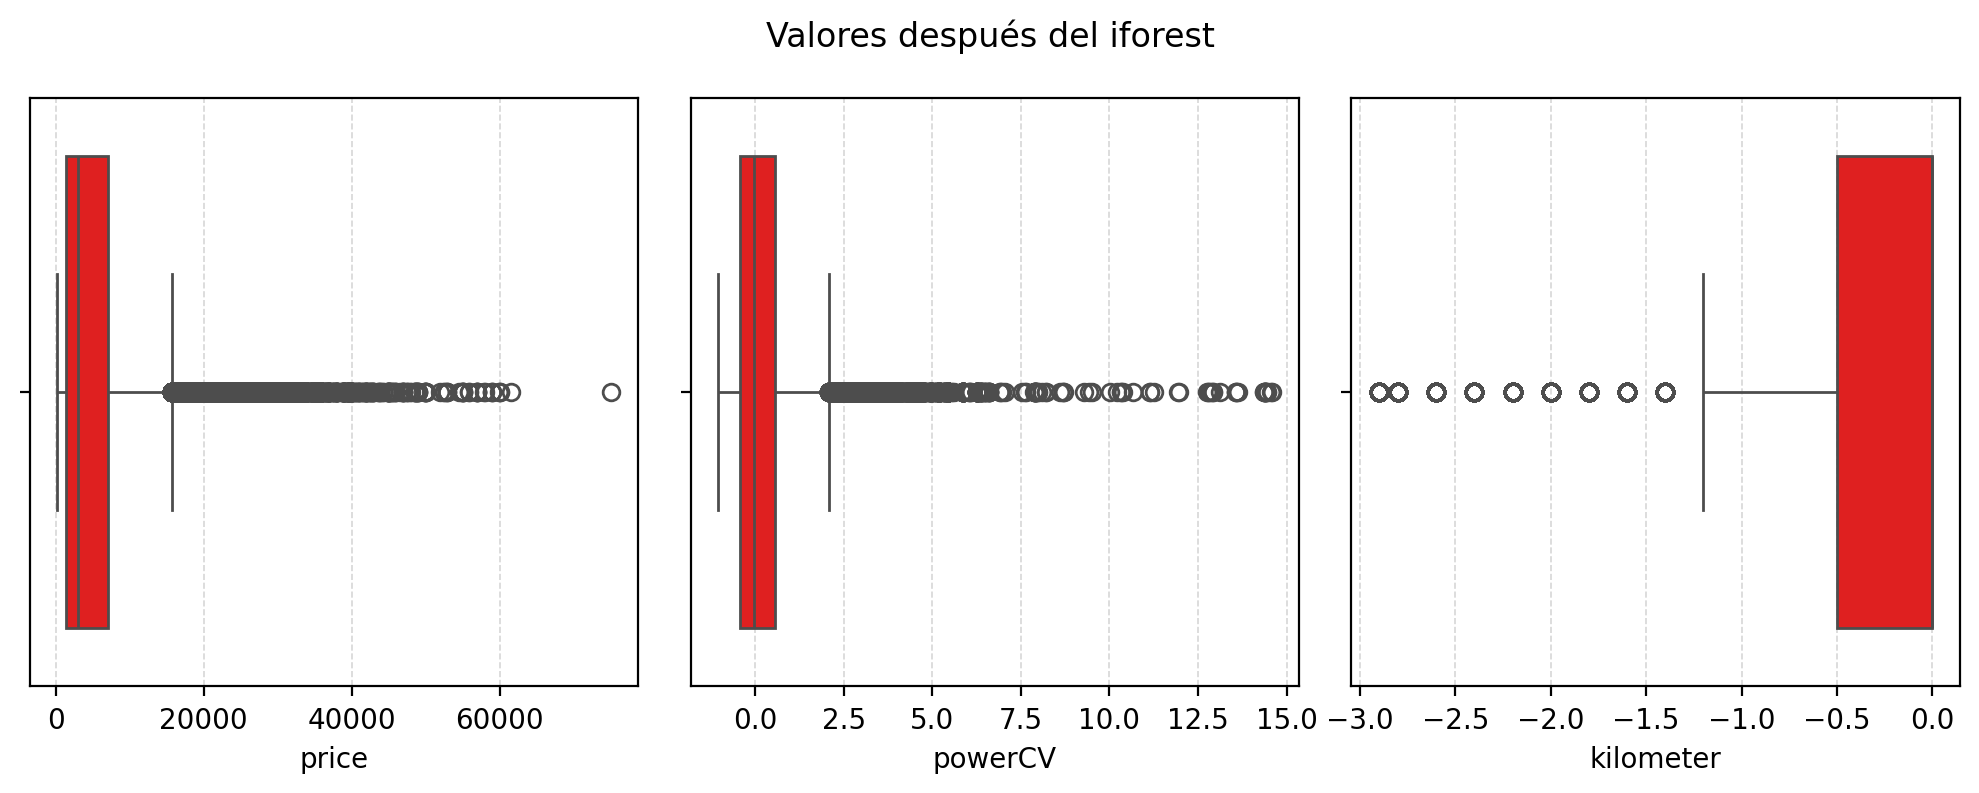

In [117]:
fig, axes = plt.subplots(1,3, figsize = (10,4), dpi = 200)
for i, col in enumerate(df.select_dtypes("number").columns[:3]):
    axes[i].grid(ls = "--", lw = 0.6, alpha = 0.5)
    sns.boxplot(df, x = col, ax = axes[i])
plt.suptitle("Valores antes del iforest")
plt.tight_layout()

plt.show()

fig, axes = plt.subplots(1,3, figsize = (10,4), dpi = 200)
for i, col in enumerate(df.select_dtypes("number").columns[:3]):
    axes[i].grid(ls = "--", lw = 0.6, alpha = 0.5)
    sns.boxplot(df_filtered_1, x = col, ax = axes[i], color="red")
plt.suptitle("Valores después del iforest")
plt.tight_layout()

plt.show()


En el caso del boxplot vemos el mismo efecto que el histograma. Vemos que aún seguimos teniendo outliers (los que son menos atípicos), los cuales serán tratados en el segundo paso de nuestro proceso: usando Local Outlier Factor (LOF). Algo a remarcar es la variable `kilometer`, la la cual parece que aumenta su número de outliers. Lo que sucede es que nuestro algoritmo IFO ha clasificado, con la vista general, a algunos valores localizados en el bigote izquierdo como outlier, haciendo que el Q1 se desplace a la derecha, y por ende, reduciendo el IQR y el rango de valores no atípicos.

In [118]:
df_filtered_1 = df_filtered_1.drop(columns = df_filtered_1.filter(like="iforest").columns)

In [119]:
df_numeric_filtered_1 = df_filtered_1.select_dtypes("number")

In [120]:
df_filtered_1.loc[df_filtered_1[df_filtered_1["price"] > 30000].index, df_numeric.drop(columns = 'price').columns] = np.nan

In [121]:
df_filtered_1.reset_index(drop=True, inplace=True)

In [122]:
imputer = IterativeImputer(estimator=RandomForestRegressor())
imputed_cols = pd.DataFrame(imputer.fit_transform(X=df_filtered_1[["price", "powerCV", "kilometer"]]), columns = ["price", "powerCV", "kilometer"])

In [123]:
df_filtered_1[["price", "powerCV", "kilometer"]] = imputed_cols

In [124]:
df_filtered_1.to_csv("../../datos/outliers_cleansed_it1.csv")

In [125]:
df_filtered_1.sort_values("price").tail()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
323839,2016-03-29 20:47:10,Porsche_911_SC_Targa_3.0_MATCHING_ERSTLACK_MOT...,private,offer,59911.0,test,coupe,Coche Retro-Moderno,manually,2.293849,911,-0.063167,july,petrol,porsche,no,2016-03-29,80798,2016-04-06 07:16:11
42219,2016-03-24 20:51:59,Mercedes_c220,private,offer,60000.0,test,combi,Coche Moderno,automatic,2.293849,c_klasse,-0.063167,december,diesel,mercedes_benz,yes,2016-03-24,38114,2016-04-01 18:21:06
249340,2016-04-02 15:49:32,Mercedes_Benz_280sl_Pagode_seltener_Handschalter,private,offer,60000.0,control,convertible,Coche Clásico,manually,2.293849,sl,-0.063167,unknown,petrol,mercedes_benz,no,2016-04-02,67067,2016-04-06 14:45:56
88343,2016-03-29 21:36:44,Austin_Healey_BJ7,private,offer,61500.0,test,convertible,Coche Clásico,manually,2.293849,unknown,-0.063167,july,petrol,sonstige_autos,no,2016-03-29,75446,2016-04-06 09:17:18
139454,2016-03-06 10:43:36,Mercedes_Benz_300,private,offer,75000.0,test,coupe,Coche Clásico,automatic,2.293849,andere,-0.063167,june,petrol,mercedes_benz,no,2016-03-06,71111,2016-04-06 02:45:33


In [126]:
# neighs = np.linspace(15,45,5, dtype=int)
# lof_combis = list(product(neighs, conts))

In [127]:
# for neighbour, contaminacion in tqdm(lof_combis):
#     print(f"Creando lof_{neighbour}_{contaminacion}")
#     lof = LocalOutlierFactor(n_neighbors=neighbour, contamination=contaminacion, n_jobs=-1)
#     df_filtered_1[f"lof_{neighbour}_{contaminacion:.3f}"] = lof.fit_predict(X = df_numeric_filtered_1)

In [128]:
# df_lof = df_filtered_1.filter(like="lof")

In [129]:
# x = df_numeric_filtered_1["powerCV"]
# y = df_numeric_filtered_1["kilometer"]
# z = df_numeric_filtered_1["price"]

# color = {1 : "blue", -1 : "red"}

# n_rows = 5
# n_cols = 5

# fig = plt.figure(figsize=(16, 16), dpi=150)

# for idx, col in enumerate(df_lof.columns):
#     colors = df_lof[col].map(color) 
    

#     ax = fig.add_subplot(n_rows, n_cols, idx + 1, projection='3d')
#     ax.scatter(x, y, z, c=colors, alpha = 0.3)
    
#     ax.set_title(f"Gráfico 3D para '{col}'")
#     ax.set_xlabel("powerCV")
#     ax.set_ylabel("kilometer")
#     ax.set_zlabel("price")

#     ax.set_zlim(top=1e6)
# plt.tight_layout()
# plt.show()


Vamos a observar los valores de

In [130]:
# percentages_filter_1 = df_lof.apply(percent_outs, axis=1)

In [131]:
# outliers = df_filtered_1[percentages_filter_1>70]
# normals = df_filtered_1[percentages_filter_1<70]

In [132]:
# fig, axes = plt.subplots(1,3, figsize = (10,4), dpi = 200)
# for i, col in enumerate(df.select_dtypes("number").columns[:3]):
#     axes[i].grid(ls = "--", lw = 0.6, alpha = 0.5)
#     sns.histplot(df_filtered_1, x = col, bins = 30, ax = axes[i], color="red")
# plt.suptitle("Valores antes del LOF")
# plt.tight_layout()

# plt.show()

# fig, axes = plt.subplots(1,3, figsize = (10,4), dpi = 200)
# for i, col in enumerate(df.select_dtypes("number").columns[:3]):
#     axes[i].grid(ls = "--", lw = 0.6, alpha = 0.5)
#     sns.histplot(normals, x = col, bins = 30,  ax= axes[i], color="green")
# plt.suptitle("Valores después del LOF")
# plt.tight_layout()

# plt.show()


In [133]:
# fig, axes = plt.subplots(1,3, figsize = (10,4), dpi = 200)
# for i, col in enumerate(df.select_dtypes("number").columns[:3]):
#     axes[i].grid(ls = "--", lw = 0.6, alpha = 0.5)
#     sns.boxplot(df_filtered_1, x = col, ax = axes[i], color="red")
# plt.suptitle("Valores antes del LOF")
# plt.tight_layout()

# plt.show()

# fig, axes = plt.subplots(1,3, figsize = (10,4), dpi = 200)
# for i, col in enumerate(df.select_dtypes("number").columns[:3]):
#     axes[i].grid(ls = "--", lw = 0.6, alpha = 0.5)
#     sns.boxplot(normals, x = col,  ax= axes[i], color="green")
# plt.suptitle("Valores después del LOF")
# plt.tight_layout()

# plt.show()


Vemos que no hay diferencias muy claras entre los valores originales con los que obtendríamos si eliminaramos los outliers producidos por el método. Sin embargo, debemos conocer un poco mejor nuestros datos antes de tomar medidas de este tipo.

In [134]:
# normal_cat = df_filtered_1.drop(index=outliers.index).select_dtypes('O')
# normal_num = df_filtered_1.drop(index=outliers.index).drop(columns = df_lof.columns).select_dtypes('number')
# normal_cat_describe = normal_cat.describe().T
# normal_num_describe =normal_num.describe().T

# outliers_cat = df_filtered_1.loc[outliers.index]
# outliers_num = df_filtered_1.loc[outliers.index].drop(columns = df_lof.columns).select_dtypes('number')
# outliers_cat_describe = outliers_cat.select_dtypes('O').describe().T
# outliers_num_describe = outliers_num.describe().T

In [135]:
# display(pd.concat([normal_cat_describe,outliers_cat_describe], axis= 1))
# print('----------------------------------------------------------------')
# display(pd.concat([normal_num_describe,outliers_num_describe], axis= 0))

Observando los categóricos, no vemos diferencias muy grandes, lo cual es esperable ya que no se consideraron para la identificación de los valores atípicos. En cuanto a los numéricos, vemos que los precios de los atípicos son más bajos que en los datos normales. Para decidir qué hacer con estos outliers, una opción podría ser ver si hay diferencias significativas entre las distribuciones de ambos lados, usando un contraste de hipótesis.

No son distribuciones normales, usaremos no paramétricos directamente, concretamente el test de Mann-Whitney, al tratarse de pares de muestras independientes.

In [136]:
# import scipy.stats as stats

# for col in outliers_num.columns:
#     print(col)
#     print(stats.mannwhitneyu(normal_num[col], outliers_num[col]))
#     print()

Ninguna de las distribuciones son similares a las distribuciones de los datos no atípicos, por lo que optaremos por imputar los valores de powerCV y kilometers (no price porque es variable respuesta). Vamos a usar un RandomForest.

In [137]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor

In [138]:
# df_filtered_1.loc[outliers.index, "powerCV"] = np.nan
# df_filtered_1.loc[outliers.index, "kilometer"] = np.nan

In [139]:
# df_filtered_1.reset_index(drop=True, inplace=True)

In [140]:
# imputer = IterativeImputer(estimator=RandomForestRegressor())
# imputed_cols = pd.DataFrame(imputer.fit_transform(X=df_filtered_1[["price", "powerCV", "kilometer"]]), columns = ["price", "powerCV", "kilometer"])

In [141]:
# df_final = df_filtered_1.drop(columns = df_filtered_1.filter(like="lof").columns)
# df_final[["price", "powerCV", "kilometer"]] = imputed_cols

In [142]:
# df_final.describe().T

In [143]:
# df_filtered_1.drop(columns = df_filtered_1.filter(like="lof").columns).describe().T

Vemos que los valores en general no varían mucho de los originales, lo cual es esperable dado que no representaban ni un 3% de éstos. Podemos visualizarlo también con las distribuciones:

In [144]:
# fig, axes = plt.subplots(1,3, figsize = (10,4), dpi = 200)
# for i, col in enumerate(df.select_dtypes("number").columns[:3]):
#     axes[i].grid(ls = "--", lw = 0.6, alpha = 0.5)
#     sns.histplot(df_filtered_1, x = col, bins = 30,  ax= axes[i], color="green")
# plt.suptitle("Valores originales")
# plt.tight_layout()

# plt.show()

# fig, axes = plt.subplots(1,3, figsize = (10,4), dpi = 200)
# for i, col in enumerate(df.select_dtypes("number").columns[:3]):
#     axes[i].grid(ls = "--", lw = 0.6, alpha = 0.5)
#     sns.histplot(df_final, x = col, bins = 30, ax = axes[i], color="red")
# plt.suptitle("Valores tras imputar")
# plt.tight_layout()

# plt.show()


Vemos que, al igual que antes con el LOF, no cambia demasiado después de imputar, también debido a la baja proporción que representan nuestros datos, por lo que la imputación ha sido satisfactoria, no modificando mucho las métricas ni las distribuciones.

In [145]:
# df_final.to_csv("datos/df_outlier_cleansed.csv")